In [6]:
import tweepy # For twitter connection
import numpy as np # linear algebra
import pandas as tpd # data processing, CSV file I/O (e.g. pd.read_csv)
import tweepy as tw # To extarct the twitter data
from tqdm import tqdm #For displaying progress bar

In [7]:
access_token="787244004098187264-PPvZdf2EOC7CyuyPZtJxKIKf0ysYKNj"
access_token_secret="0RCDdU87BKyggnLyHCKA4LkUMgfp418Gq0wxyllwzxlPa"
consumer_key="LdtitxXRoMWiyy6SC7ZCfxPCd"
consumer_secret="johM0OL8kg3sVfgYOx7PWfyuQZGNy92CpfEjxZL3W5quyKAlcE"

# Creating the authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# Setting your access token and secret
auth.set_access_token(access_token, access_token_secret)
# Creating the API object while passing in auth information
api = tweepy.API(auth)

In [8]:
search_words = "#Omicron -filter:retweets"  #Type you keywork here instead of #Omicron
#You can fix a time frame with the date since and date until parameters
date_since = "2022-01-01"
# Collect tweets
tweets = tweepy.Cursor(api.search_tweets,
              q=search_words,
              lang="en",
              since=date_since
              ).items(800) #We instruct the cursor to return maximum of 400 tweets

In [5]:
tweets_copy = []
for tweet in tqdm(tweets):
    tweets_copy.append(tweet)

print(f"New tweets retrieved: {len(tweets_copy)}")

0it [00:00, ?it/s]Unexpected parameter: since
1it [00:00,  1.91it/s]Unexpected parameter: since
16it [00:00, 20.52it/s]Unexpected parameter: since
31it [00:01, 27.23it/s]Unexpected parameter: since
46it [00:01, 31.00it/s]Unexpected parameter: since
61it [00:02, 30.36it/s]Unexpected parameter: since
76it [00:02, 29.83it/s]Unexpected parameter: since
91it [00:03, 31.79it/s]Unexpected parameter: since
106it [00:03, 33.29it/s]Unexpected parameter: since
121it [00:03, 35.29it/s]Unexpected parameter: since
136it [00:04, 34.58it/s]Unexpected parameter: since
151it [00:04, 35.41it/s]Unexpected parameter: since
166it [00:05, 35.85it/s]Unexpected parameter: since
181it [00:05, 31.25it/s]Unexpected parameter: since
196it [00:06, 32.89it/s]Unexpected parameter: since
211it [00:06, 31.52it/s]Unexpected parameter: since
226it [00:07, 33.03it/s]Unexpected parameter: since
241it [00:07, 31.77it/s]Unexpected parameter: since
256it [00:08, 31.05it/s]Unexpected parameter: since
271it [00:08, 32.52it/s]Un

New tweets retrieved: 800


In [10]:
import pandas as pd
tweets_df = pd.DataFrame()
for tweet in tqdm(tweets_copy):
    hashtags = []
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
    except:
        pass
    tweets_df = tweets_df.append(pd.DataFrame({'user_location': tweet.user.location,\
                                               'date': tweet.created_at,
                                               'text': tweet.text,
                                               'hashtags': [hashtags if hashtags else None],
                                               'source': tweet.source,
                                               'is_retweet': tweet.retweeted}, index=[0]))
print(tweets_df)

100%|██████████| 800/800 [00:01<00:00, 537.29it/s]

                    user_location                      date  \
0               God’s own Country 2022-01-07 02:53:18+00:00   
0                        Colorado 2022-01-07 02:53:08+00:00   
0   Nomad (St Thomas, ON for now) 2022-01-07 02:53:06+00:00   
0                                 2022-01-07 02:52:32+00:00   
0                    Florida, USA 2022-01-07 02:52:31+00:00   
..                            ...                       ...   
0                 Wherever I am…. 2022-01-07 00:26:19+00:00   
0                                 2022-01-07 00:26:08+00:00   
0                      Hobart, WA 2022-01-07 00:26:04+00:00   
0            Melbourne, Australia 2022-01-07 00:26:04+00:00   
0                        Malaysia 2022-01-07 00:25:55+00:00   

                                                 text  \
0   #OmicronVirus #Omicron real Truth #Mutation to...   
0   Keep sending tech from #CES2022\nI'm home for ...   
0   A *MUST-READ* thread about the reality behind ...   
0   Clear Data 

In [11]:
tweets_df.to_csv('Om3.csv',index=False)

In [12]:
import pandas as pd
import html
import re
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
import nltk
from textblob import TextBlob
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kkonar2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kkonar2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
pd.set_option('display.max_colwidth',None)
data = pd.read_csv("C:/Users/kkonar2/Om3.csv")
new_data = data.drop_duplicates('text',keep='first')
new_data.to_csv('Om4_new1.csv',index=False)
new_sample = pd.read_csv("C:/Users/kkonar2/Om4_new1.csv")

In [17]:
tweets = new_sample['text']
for i in range(len(tweets)):
    x=tweets[i].replace('\n', '')
    tweets[i]=html.unescape(x)
    tweets[i]=re.sub(r"(@[A-Za-z0–9_]+)|[^\w\s]|#|RT|http\S+", "", tweets[i])

print(tweets.head())
sw = stopwords.words('english')
sw.remove('not')

C:\Users\kkonar2\AppData\Local\Temp/ipykernel_1756/543057943.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets[i]=html.unescape(x)
C:\Users\kkonar2\AppData\Local\Temp/ipykernel_1756/543057943.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets[i]=re.sub(r"(@[A-Za-z0–9_]+)|[^\w\s]|#|RT|http\S+", "", tweets[i])


0                                                          OmicronVirus Omicron real Truth Mutation to be continued  
1       Keep sending tech from CES2022Im home for a month avoiding Omicron Is there anything for the normal consumer 
2        A MUSTREAD thread about the reality behind Omicrons mild symptoms Its not short but the info is something w 
3    Clear Data on Omicron from NY If you are vaccinated you are much less likely to get sick and if you do get sick 
4                        1000   the virus really doesnt care about your politics or mine covid covid_19 omicron delta
Name: text, dtype: object


In [18]:
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in tweets]

sentiment_objects[0].polarity, sentiment_objects[0]
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]
# Create dataframe containing the polarity value and tweet text
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity","tweet"])
print(sentiment_df.head())

   polarity  \
0  0.200000   
1  0.150000   
2 -0.022222   
3 -0.299048   
4  0.200000   

                                                                                                              tweet  
0                                                        OmicronVirus Omicron real Truth Mutation to be continued    
1     Keep sending tech from CES2022Im home for a month avoiding Omicron Is there anything for the normal consumer   
2      A MUSTREAD thread about the reality behind Omicrons mild symptoms Its not short but the info is something w   
3  Clear Data on Omicron from NY If you are vaccinated you are much less likely to get sick and if you do get sick   
4                      1000   the virus really doesnt care about your politics or mine covid covid_19 omicron delta  


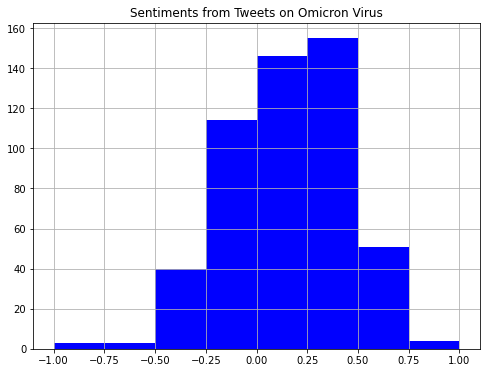

In [19]:
# Remove polarity values equal to zero
sentiment_df = sentiment_df[sentiment_df.polarity != 0]
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="Blue")

plt.title("Sentiments from Tweets on Omicron Virus")
plt.show()